# Image Classification with Deep Learning

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [10]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [11]:
# Data preprocessing
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 44ms/step - loss: 1.5376 - accuracy: 0.4369 - val_loss: 1.2682 - val_accuracy: 0.5489
Epoch 2/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1575 - accuracy: 0.5894 - val_loss: 1.1050 - val_accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0075 - accuracy: 0.6447 - val_loss: 1.0186 - val_accuracy: 0.6514
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9092 - accuracy: 0.6779 - val_loss: 0.9570 - val_accuracy: 0.6715
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8389 - accuracy: 0.7041 - val_loss: 0.9437 - val_accuracy: 0.6835
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7821 - accuracy: 0.7266 - val_loss: 0.8900 - val_accuracy: 0.7034
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7359 - accuracy: 0.7432 - val_loss: 0.8674 -

In [15]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 5s 15ms/step - loss: 0.8550 - accuracy: 0.7219
Test accuracy: 0.7218999862670898


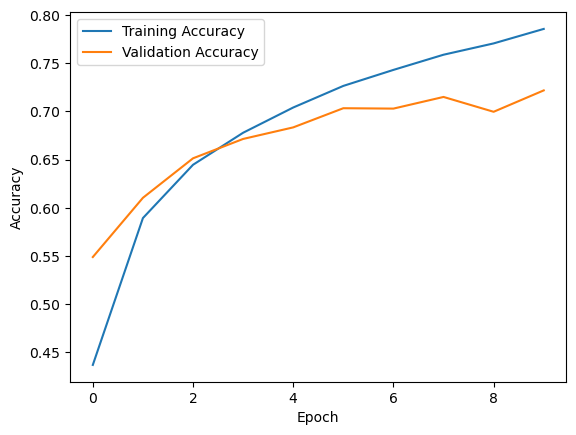

In [16]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()